In [1]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8899eb03-3414-400d-81f4-debad6f17177',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-24T20:10:18.624Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9926}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9634, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd

# Allows to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# This normalizes the data and makes it more presentable in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9634,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.910218e+07,1.910218e+07,NaN,1,NaN,NaN,None,2022-07-24T20:08:00.000Z,22718.954037,2.204863e+10,-5.5531,-0.011863,1.737760,8.145435,6.686256,-23.295941,-43.598578,4.339816e+11,41.6058,4.770980e+11,None,2022-07-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216813e+08,1.216813e+08,NaN,2,NaN,NaN,None,2022-07-24T20:07:00.000Z,1601.749379,1.536670e+10,3.7792,0.225571,5.442730,19.060224,30.073762,-18.104644,-46.934099,1.949030e+11,18.6831,1.949030e+11,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
2,825,Tether,USDT,tether,36592,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.584128e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-24T20:07:00.000Z,1.000042,3.952734e+10,-5.8373,-0.001469,0.001239,0.033676,0.069017,0.109996,-0.023351,6.584404e+10,6.3125,6.816983e+10,None,2022-07-24T20:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 20:10:27.157688
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.509612e+10,5.509612e+10,NaN,4,NaN,NaN,None,2022-07-24T20:07:00.000Z,0.999955,4.716341e+09,-12.2366,-0.014761,-0.021140,-0.019724,-0.021287,-0.006635,-0.194060,5.509363e+10,5.2816,5.509363e+10,None,2022-07-24T20:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 20:10:27.157688
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-24T20:07:00.000Z,262.002021,8.814743e+08,-19.8213,-0.188602,2.256142,5.002712,9.206238,-19.696824,-34.975141,4.227069e+10,4.0523,5.240040e+10,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
5,4687,Binance USD,BUSD,binance-usd,4145,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,None,2022-07-24T20:08:00.000Z,1.001231,4.442126e+09,-3.1320,0.192703,0.028831,0.165782,0.083681,0.191742,0.155754,1.756882e+10,1.6843,1.756882e+10,None,2022-07-24T20:08:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-24 20:10:27.157688
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-07-24T20:08:00.000Z,0.361734,8.858854e+08,3.0051,-0.237914,1.942793,3.842506,-0.601072,-10.742206,-47.391243,1.748736e+10,1.6764,3.617343e+10,None,2022-07-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.427770e+10,NaN,8,NaN,NaN,None,2022-07-24T20:07:00.000Z,0.516897,1.029030e+09,55.8956,-0.170356,6.849316,15.738921,2.394978,0.510545,-41.742687,1.744660e+10,1.6724,2.326037e+10,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
8,5426,Solana,SOL,solana,350,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.457613e+08,5.116169e+08,NaN,9,NaN,NaN,None,

In [5]:
def api_runner():  #call function
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # call API
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {                                                                 # use key
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '8899eb03-3414-400d-81f4-debad6f17177',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df= df.append(df2)

    if not os.path.isfile(r'/Users/gregorygreen/API.csv'):                          # append data to a csv: in case of computer shutdown
        df.to_csv(r'/Users/gregorygreen/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/gregorygreen/API.csv', mode='a', header=False)

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_6154/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_6154/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9634,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.910218e+07,1.910218e+07,NaN,1,NaN,NaN,None,2022-07-24T20:08:00.000Z,22718.954037,2.204863e+10,-5.5531,-0.011863,1.737760,8.145435,6.686256,-23.295941,-43.598578,4.339816e+11,41.6058,4.770980e+11,None,2022-07-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216813e+08,1.216813e+08,NaN,2,NaN,NaN,None,2022-07-24T20:07:00.000Z,1601.749379,1.536670e+10,3.7792,0.225571,5.442730,19.060224,30.073762,-18.104644,-46.934099,1.949030e+11,18.6831,1.949030e+11,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
2,825,Tether,USDT,tether,36592,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.584128e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-24T20:07:00.000Z,1.000042,3.952734e+10,-5.8373,-0.001469,0.001239,0.033676,0.069017,0.109996,-0.023351,6.584404e+10,6.3125,6.816983e+10,None,2022-07-24T20:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 20:10:27.157688
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.509612e+10,5.509612e+10,NaN,4,NaN,NaN,None,2022-07-24T20:07:00.000Z,0.999955,4.716341e+09,-12.2366,-0.014761,-0.021140,-0.019724,-0.021287,-0.006635,-0.194060,5.509363e+10,5.2816,5.509363e+10,None,2022-07-24T20:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 20:10:27.157688
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-24T20:07:00.000Z,262.002021,8.814743e+08,-19.8213,-0.188602,2.256142,5.002712,9.206238,-19.696824,-34.975141,4.227069e+10,4.0523,5.240040e+10,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
5,4687,Binance USD,BUSD,binance-usd,4145,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,None,2022-07-24T20:08:00.000Z,1.001231,4.442126e+09,-3.1320,0.192703,0.028831,0.165782,0.083681,0.191742,0.155754,1.756882e+10,1.6843,1.756882e+10,None,2022-07-24T20:08:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-24 20:10:27.157688
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-07-24T20:08:00.000Z,0.361734,8.858854e+08,3.0051,-0.237914,1.942793,3.842506,-0.601072,-10.742206,-47.391243,1.748736e+10,1.6764,3.617343e+10,None,2022-07-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.427770e+10,NaN,8,NaN,NaN,None,2022-07-24T20:07:00.000Z,0.516897,1.029030e+09,55.8956,-0.170356,6.849316,15.738921,2.394978,0.510545,-41.742687,1.744660e+10,1.6724,2.326037e+10,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
8,5426,Solana,SOL,solana,350,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.457613e+08,5.116169e+08,NaN,9,NaN,NaN,None,

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9634,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102181.00000,19102181.00000,NaN,1,NaN,NaN,None,2022-07-24T20:08:00.000Z,22718.95404,22048632405.50443,-5.55310,-0.01186,1.73776,8.14543,6.68626,-23.29594,-43.59858,433981572145.33923,41.60580,477098034776.87000,None,2022-07-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121681331.99900,121681331.99900,NaN,2,NaN,NaN,None,2022-07-24T20:07:00.000Z,1601.74938,15366695984.98415,3.77920,0.22557,5.44273,19.06022,30.07376,-18.10464,-46.93410,194902997931.37091,18.68310,194902997931.37000,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
2,825,Tether,USDT,tether,36592,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65841277710.53098,68166976392.72330,NaN,3,NaN,NaN,None,2022-07-24T20:07:00.000Z,1.00004,39527342526.10562,-5.83730,-0.00147,0.00124,0.03368,0.06902,0.11000,-0.02335,65844035650.21014,6.31250,68169831750.57000,None,2022-07-24T20:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 20:10:27.157688
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55096123304.92577,55096123304.92577,NaN,4,NaN,NaN,None,2022-07-24T20:07:00.000Z,0.99995,4716341111.17667,-12.23660,-0.01476,-0.02114,-0.01972,-0.02129,-0.00664,-0.19406,55093629176.47890,5.28160,55093629176.48000,None,2022-07-24T20:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 20:10:27.157688
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-24T20:07:00.000Z,262.00202,881474310.24827,-19.82130,-0.18860,2.25614,5.00271,9.20624,-19.69682,-34.97514,42270688502.40077,4.05230,52400404242.42000,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
5,4687,Binance USD,BUSD,binance-usd,4145,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,None,2022-07-24T20:08:00.000Z,1.00123,4442125717.79473,-3.13200,0.19270,0.02883,0.16578,0.08368,0.19174,0.15575,17568821901.23330,1.68430,17568821901.23000,None,2022-07-24T20:08:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 20:10:27.157688
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,None,2022-07-24T20:08:00.000Z,0.36173,885885413.24411,3.00510,-0.23791,1.94279,3.84251,-0.60107,-10.74221,-47.39124,17487356848.47871,1.67640,36173427884.19000,None,2022-07-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 20:10:27.157688
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,8,NaN,NaN,None,2022-07-24T20:07:00.000Z,0.51690,1029030158.01652,55.89560,-0.17036,6.84932,15.73892,2.39498,0.51054,-41.74269,17446604033.85713,1.67240,23260370874.49000,None,2022-07-24T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 

In [10]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.00236,1.75367,8.15547,6.68066,-23.30424,-43.59002
Ethereum,0.28250,5.48874,19.10750,30.03558,-18.08004,-46.91527
Tether,-0.00176,0.00076,0.03321,0.06791,0.10950,-0.02194
USD Coin,-0.00810,-0.01709,-0.01500,-0.01317,0.00057,-0.14806
BNB,-0.14159,2.31495,5.06223,9.24111,-19.66947,-34.96215
Binance USD,0.11483,-0.03569,0.09940,-0.04421,0.11715,0.08149
XRP,-0.20774,1.98245,3.86150,-0.65240,-10.71246,-47.39535
Cardano,-0.10938,6.88056,15.77669,2.39012,0.55091,-41.76962
Solana,-0.00889,3.37841,4.68530,-2.43272,-15.55265,-59.47229


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.00236
             quote.USD.percent_change_24h     1.75367
             quote.USD.percent_change_7d      8.15547
             quote.USD.percent_change_30d     6.68066
             quote.USD.percent_change_60d   -23.30424
             quote.USD.percent_change_90d   -43.59002
Ethereum     quote.USD.percent_change_1h      0.28250
             quote.USD.percent_change_24h     5.48874
             quote.USD.percent_change_7d     19.10750
             quote.USD.percent_change_30d    30.03558
             quote.USD.percent_change_60d   -18.08004
             quote.USD.percent_change_90d   -46.91527
Tether       quote.USD.percent_change_1h     -0.00176
             quote.USD.percent_change_24h     0.00076
             quote.USD.percent_change_7d      0.03321
             quote.USD.percent_change_30d     0.06791
             quote.USD.percent_change_60d     0.10950
             quote.USD.percent_change_90

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.00236
            quote.USD.percent_change_24h   1.75367
            quote.USD.percent_change_7d    8.15547
            quote.USD.percent_change_30d   6.68066
            quote.USD.percent_change_60d -23.30424
            quote.USD.percent_change_90d -43.59002
Ethereum    quote.USD.percent_change_1h    0.28250
            quote.USD.percent_change_24h   5.48874
            quote.USD.percent_change_7d   19.10750
            quote.USD.percent_change_30d  30.03558
            quote.USD.percent_change_60d -18.08004
            quote.USD.percent_change_90d -46.91527
Tether      quote.USD.percent_change_1h   -0.00176
            quote.USD.percent_change_24h   0.00076
            quote.USD.percent_change_7d    0.03321
            quote.USD.percent_change_30d   0.06791
            quote.USD.percent_change_60d   0.10950
            quote.USD.percent_change_90d  -0.02194
USD Coin    quote.USD.percent_change_1h   -0.00810
            quote.USD.percent_change_24h  -0.01709
            quote.USD.percent_change_7d   -0.01500
            quote.USD.percent_change_30d  -0.01317
            quote.USD.percent_change_60d   0.00057
            quote.USD.percent_change_90d  -0.14806
BNB         quote.USD.percent_change_1h   -0.14159
            quote.USD.percent_change_24h   2.31495
            quote.USD.percent_change_7d    5.06223
            quote.USD.percent_change_30d   9.24111
            quote.USD.percent_change_60d -19.66947
            quote.USD.percent_change_90d -34.96215
Binance USD quote.USD.percent_change_1h    0.11483
            quote.USD.percent_change_24h  -0.03569
            quote.USD.percent_change_7d    0.09940
            quote.USD.percent_change_30d  -0.04421
            quote.USD.percent_change_60d   0.11715
            quote.USD.percent_change_90d   0.08149
XRP         quote.USD.percent_change_1h   -0.20774
            quote.USD.percent_change_24h   1.98245
            quote.USD.percent_change_7d    3.86150
            quote.USD.percent_change_30d  -0.65240
            quote.USD.percent_change_60d -10.71246
            quote.USD.percent_change_90d -47.39535
Cardano     quote.USD.percent_change_1h   -0.10938
            quote.USD.percent_change_24h   6.88056
            quote.USD.percent_change_7d   15.77669
            quote.USD.percent_change_30d   2.39012
            quote.USD.percent_change_60d   0.55091
            quote.USD.percent_change_90d -41.76962
Solana      quote.USD.percent_change_1h   -0.00889
            quote.USD.percent_change_24h   3.37841
            quote.USD.percent_change_7d    4.68530
            quote.USD.percent_change_30d  -2.43272
            quote.USD.percent_change_60d -15.55265
            quote.USD.percent_change_90d -59.47229
Dogecoin    quote.USD.percent_change_1h   -0.00769
            quote.USD.percent_change_24h   1.37997
            quote.USD.percent_change_7d    6.44894
            quote.USD.percent_change_30d   0.97656
            quote.USD.percent_change_60d -18.02482
            quote.USD.percent_change_90d -58.69986
Dai         quote.USD.percent_change_1h    0.01568
            quote.USD.percent_change_24h   0.01953
            quote.USD.percent_change_7d    0.02978
            quote.USD.percent_change_30d  -0.07018
            quote.USD.percent_change_60d   0.00362
            quote.USD.percent_change_90d  -0.04261
Polkadot    quote.USD.percent_change_1h    0.11697
            quote.USD.percent_change_24h   2.73036
            quote.USD.percent_change_7d    5.97506
            quote.USD.percent_change_30d  -9.71506
            quote.USD.percent_change_60d -25.38998
            quote.USD.percent_change_90d -58.84092
Polygon     quote.USD.percent_change_1h    0.35476
            quote.USD.percent_change_24h   4.71035
            quote.USD.percent_change_7d   14.16061
            quote.USD.percent_change_30d  44.21858
            quote.USD.percent_change_60d  35.44923
            quo

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
# Because of how it's structured above we need to set an index. Do not want to pass a column as an index for this dataframe
# Create a range and pass that as the dataframe. 

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.00236
1,Bitcoin,quote.USD.percent_change_24h,1.75367
2,Bitcoin,quote.USD.percent_change_7d,8.15547
3,Bitcoin,quote.USD.percent_change_30d,6.68066
4,Bitcoin,quote.USD.percent_change_60d,-23.30424
5,Bitcoin,quote.USD.percent_change_90d,-43.59002
6,Ethereum,quote.USD.percent_change_1h,0.28250
7,Ethereum,quote.USD.percent_change_24h,5.48874
8,Ethereum,quote.USD.percent_change_7d,19.10750
9,Ethereum,quote.USD.percent_change_30d,30.03558


In [16]:
df7=df6.rename(columns={'level_1':
'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.00236
1,Bitcoin,quote.USD.percent_change_24h,1.75367
2,Bitcoin,quote.USD.percent_change_7d,8.15547
3,Bitcoin,quote.USD.percent_change_30d,6.68066
4,Bitcoin,quote.USD.percent_change_60d,-23.30424
5,Bitcoin,quote.USD.percent_change_90d,-43.59002
6,Ethereum,quote.USD.percent_change_1h,0.28250
7,Ethereum,quote.USD.percent_change_24h,5.48874
8,Ethereum,quote.USD.percent_change_7d,19.10750
9,Ethereum,quote.USD.percent_change_30d,30.03558


In [17]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.00236
1,Bitcoin,24h,1.75367
2,Bitcoin,7d,8.15547
3,Bitcoin,30d,6.68066
4,Bitcoin,60d,-23.30424
5,Bitcoin,90d,-43.59002
6,Ethereum,1h,0.28250
7,Ethereum,24h,5.48874
8,Ethereum,7d,19.10750
9,Ethereum,30d,30.03558


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

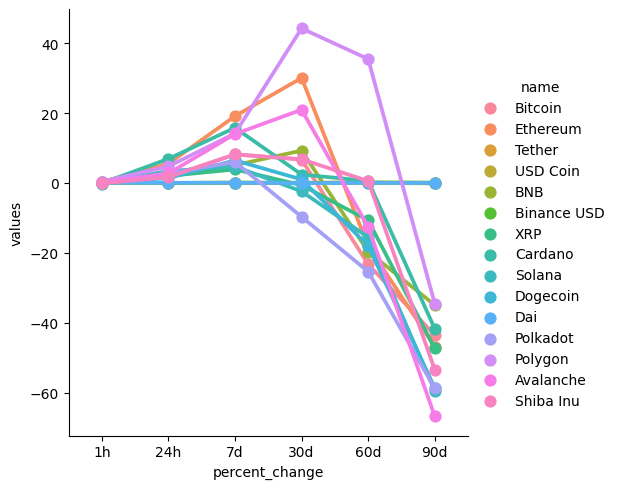

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')